## Business Problem: 
A FMCG company has entered into the instant noodles business two years back. Their higher 
management has notices that there is a miss match in the demand and supply. Where the demand is 
high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an 
inventory cost loss to the company; hence, the higher management wants to optimize the supply 
quantity in each and every warehouse in entire country. 

### Goal & Objective: The objective of this exercise is to build a model, using historical data that will 
determine an optimum weight of the product to be shipped each time to the warehouse. 
Also try to analysis the demand pattern in different pockets of the country so management can drive 
the advertisement campaign particular in those pockets. 

In [488]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [489]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [490]:
# importing dataset
df = pd.read_csv('Data.csv')

### Understanding Data

In [492]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [493]:
pd.options.display.max_columns = None

In [494]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [495]:
df.shape

(25000, 24)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Data Cleaning & Preprocessing

In [498]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

The "wh_est_year" feature has high percentage of missing values and hence this feature would be dropped from analysis. We are dropping this from our dataset to make sure that other valid observations do not get eliminated when we remove or impute the 'na' values.

In [500]:
df.drop(['wh_est_year'],axis='columns', inplace=True)

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [502]:
df.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  \
count     25000.000000   25000.000000  24010.000000   
mean          0.656880     163.537320     28.944398   
std           0.474761      62.718609      7.872534   
min           0.000000      55.000000     10.000000   
25%           0.000000     109.000000     24.000000   
50%           1.000000     164.000000     28.000000   
75%           1.000000     218.000000     33.000000   
max           1.000000     271.000000     98.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

In [503]:
### Let's examine the target column which is product_wg_ton

df.describe(include="all")["product_wg_ton"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      22102.632920
std       11607.755077
min        2065.000000
25%       13059.000000
50%       22101.000000
75%       30103.000000
max       55151.000000
Name: product_wg_ton, dtype: float64

In [504]:
# Filling missing numerical values with median
df['workers_num'].fillna(df['workers_num'].median(), inplace=True)

In [505]:
# Filling missing categorical values with mode
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0], inplace=True)

In [506]:
# Verifying that there are no null values in any column in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

### Removing Unwanted Variables

In [508]:
# Dropping irrelevant columns (IDs are not useful for prediction)
df.drop(columns=['Ware_house_ID', 'WH_Manager_ID'], inplace=True)

### Analyzing Target variable

<Axes: xlabel='product_wg_ton', ylabel='Density'>

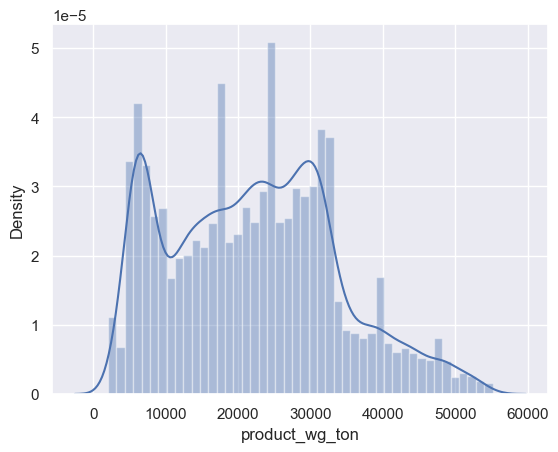

In [510]:
sns.distplot(df['product_wg_ton'])

<Axes: >

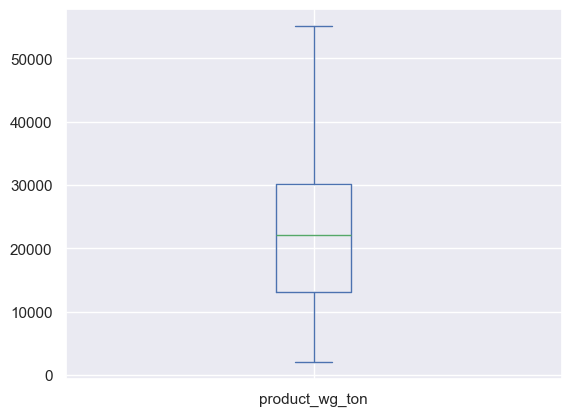

In [511]:
df['product_wg_ton'].plot(kind='box')

Target varaible is nicely distributed and does not contain any outliers

## Exploratory Data Analysis (EDA)

### Univariate Analysis

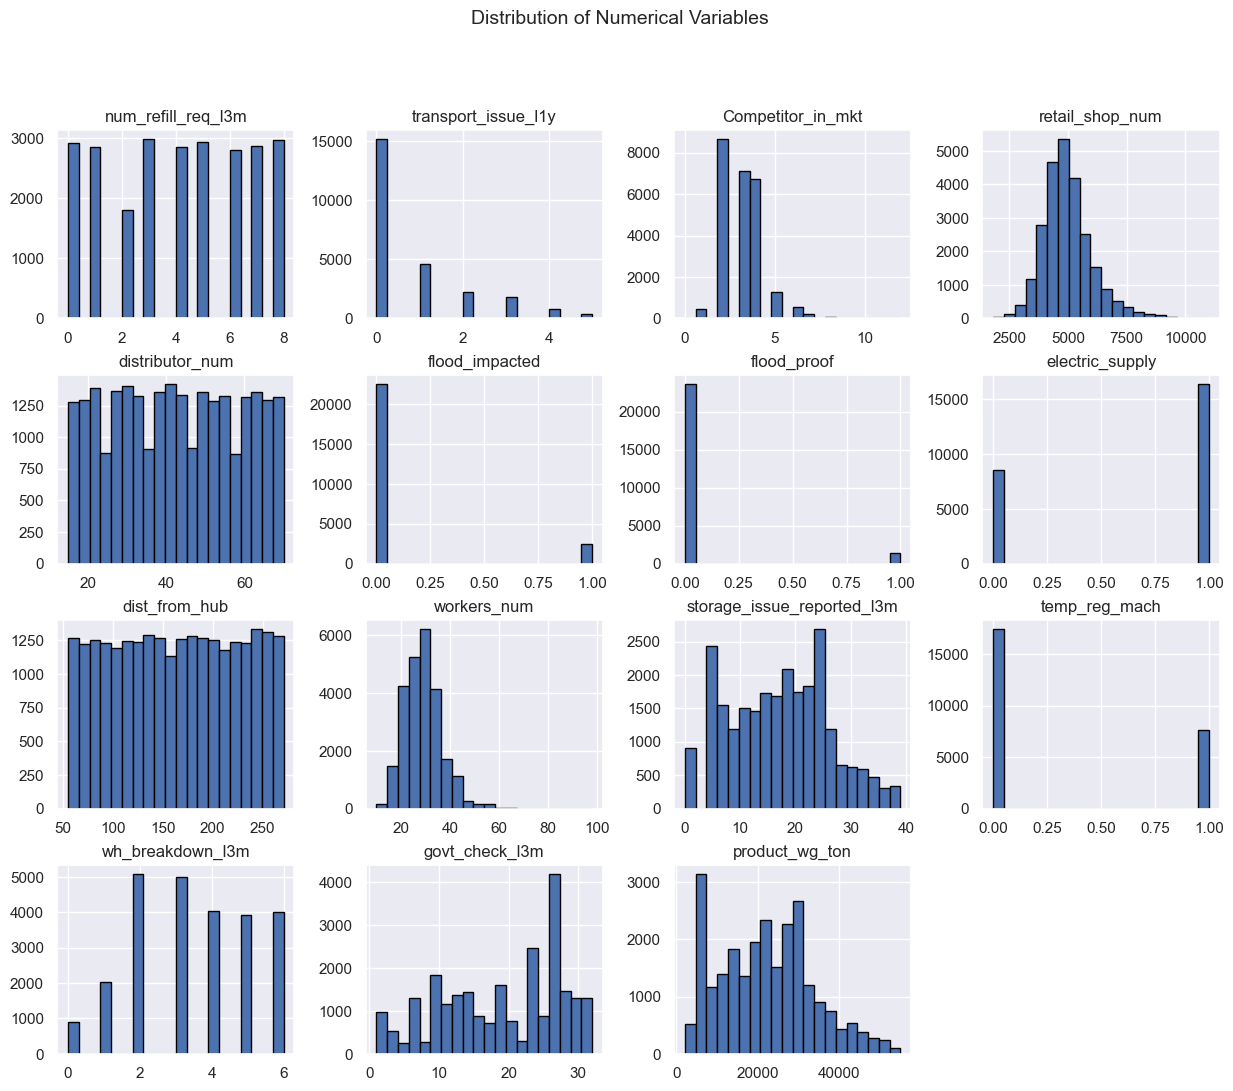

In [515]:
# Plot distribution of numerical variables
df.hist(figsize=(15, 12), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()

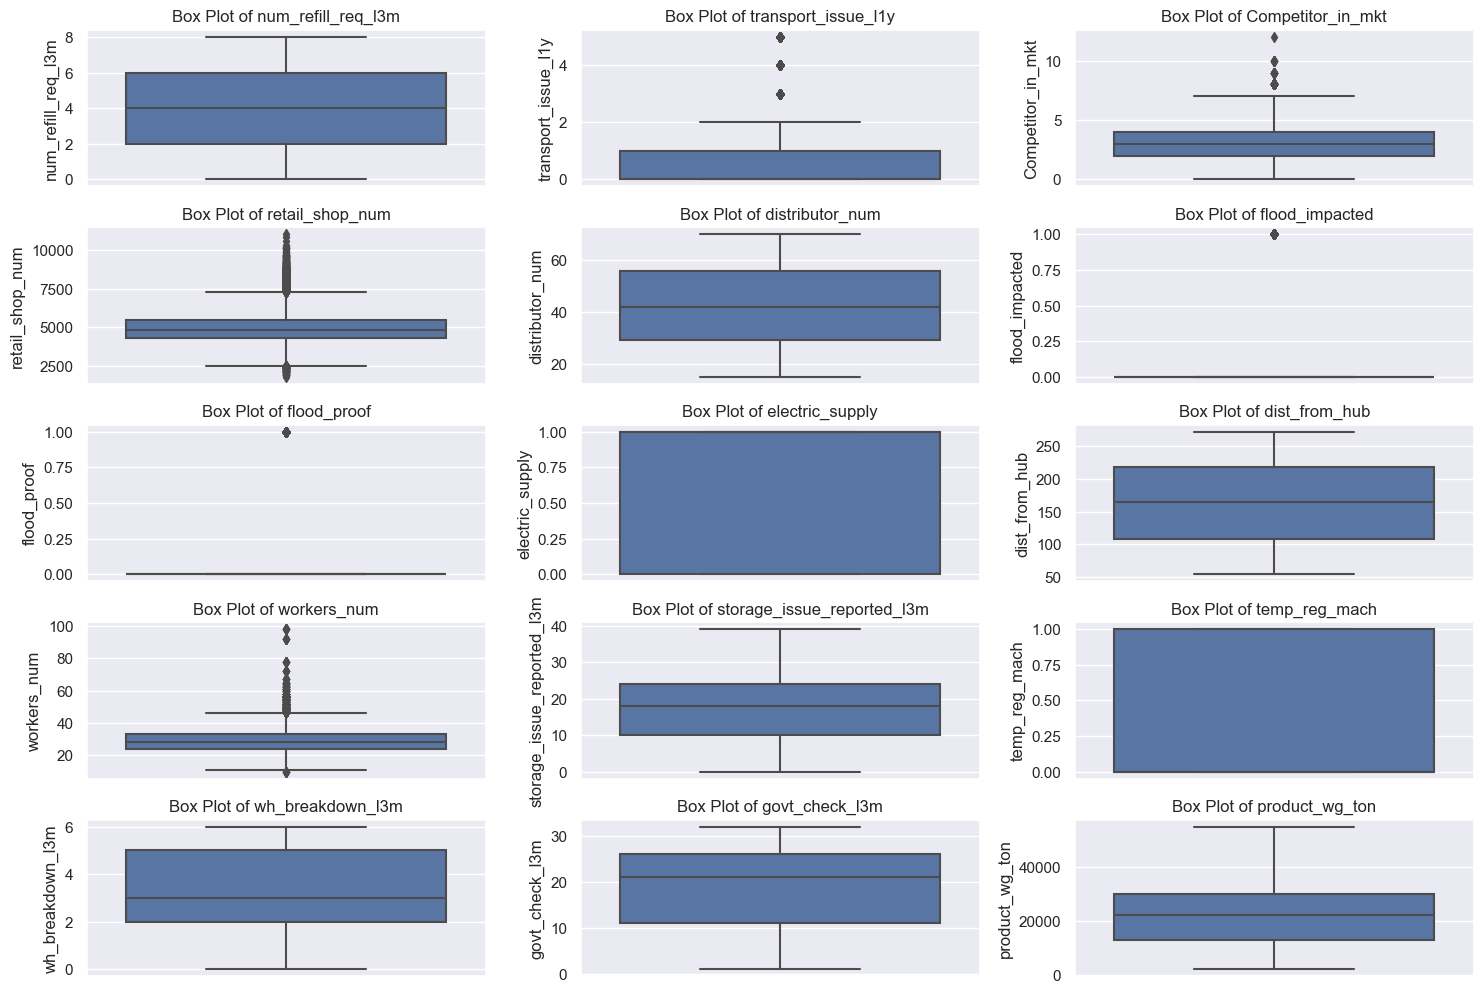

In [516]:
numeric_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust layout for better visualization
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

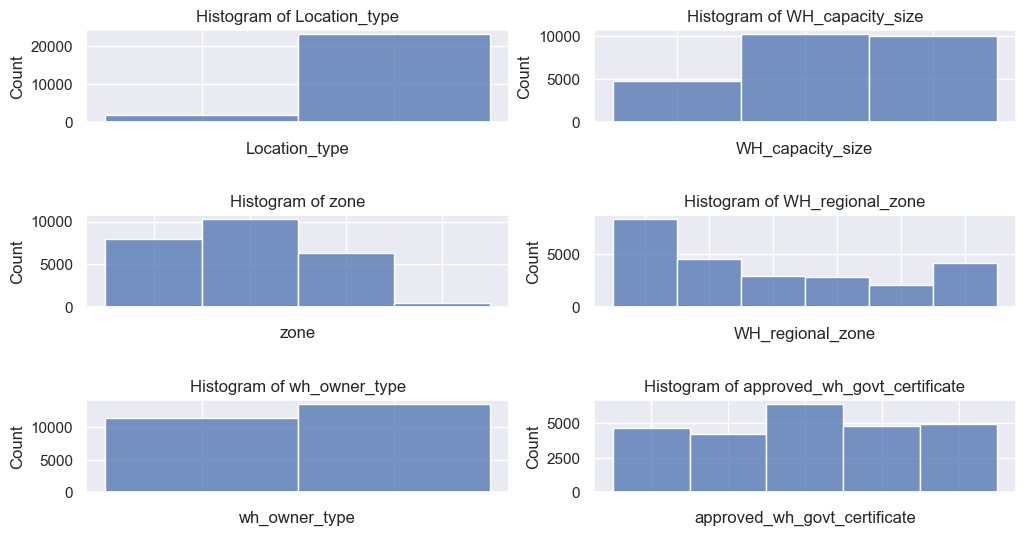

In [517]:
columns_to_plot_categorical = [
    'Location_type',
    'WH_capacity_size',
    'zone',
    'WH_regional_zone',
    'wh_owner_type',
    'approved_wh_govt_certificate']

# Create a single large subplot to display all histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
fig.subplots_adjust(hspace=1)

# For loop to draw Seaborn histogram graphs
for i, column in enumerate(columns_to_plot_categorical):
    row, col = divmod(i, 2)

    # Draw Seaborn boxplot graph
    sns.histplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xticklabels([])  # Remove labels on x-axis
    axes[row, col].tick_params(axis='x', rotation=45)

plt.show()

### Looking more into categorical variables

In [519]:
def check_value_count_for_categorical_data(column):
    print("value_count for '" ,column, "':\n", df[column].value_counts(), "\n\n-------------------------------------\n\n" )

for col in columns_to_plot_categorical:
    check_value_count_for_categorical_data(col)

value_count for ' Location_type ':
 Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64 

-------------------------------------


value_count for ' WH_capacity_size ':
 WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64 

-------------------------------------


value_count for ' zone ':
 zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64 

-------------------------------------


value_count for ' WH_regional_zone ':
 WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64 

-------------------------------------


value_count for ' wh_owner_type ':
 wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64 

-------------------------------------


value_count for ' approved_wh_govt_certificate ':
 approved_wh_govt_certificate
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: coun

Observation from Univariate Analysiss

Many columns have ouliers present and distribution is also skewed for many features

### Bi-variate Analysis

<Axes: xlabel='Location_type', ylabel='product_wg_ton'>

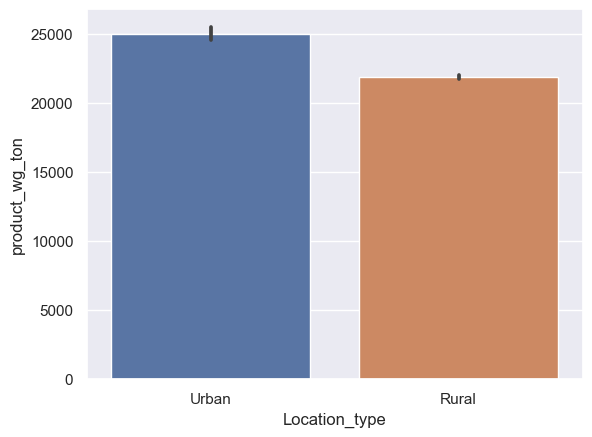

In [523]:
sns.barplot(x='Location_type',y='product_wg_ton',data=df)

<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

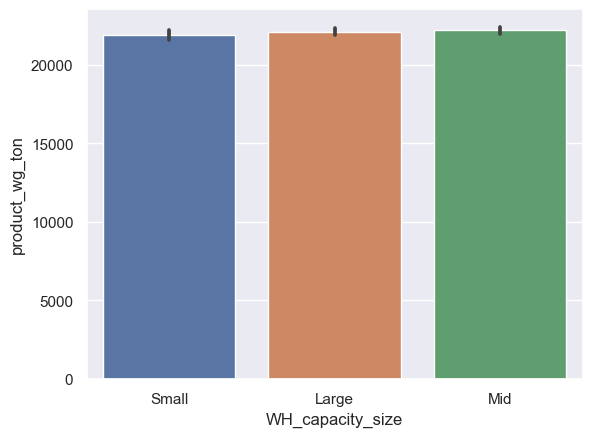

In [524]:
sns.barplot(x='WH_capacity_size',y='product_wg_ton',data=df)

<Axes: xlabel='zone', ylabel='product_wg_ton'>

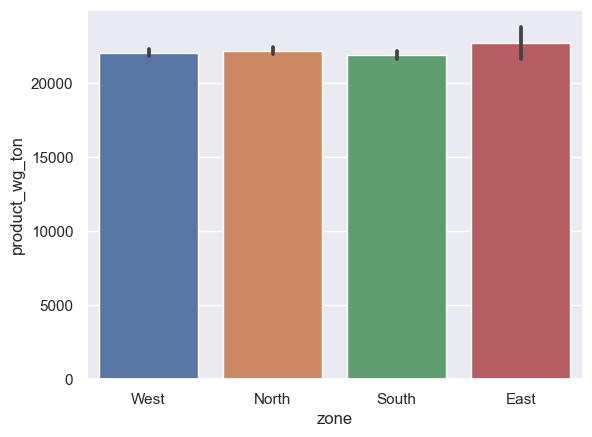

In [525]:
sns.barplot(x='zone',y='product_wg_ton',data=df)

<Axes: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

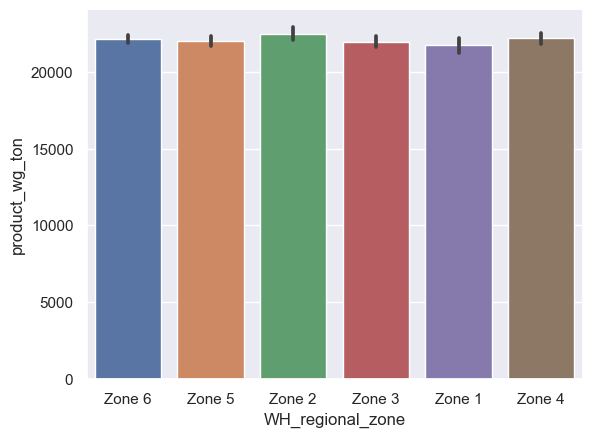

In [526]:
sns.barplot(x='WH_regional_zone',y='product_wg_ton',data=df)

<Axes: xlabel='wh_owner_type', ylabel='product_wg_ton'>

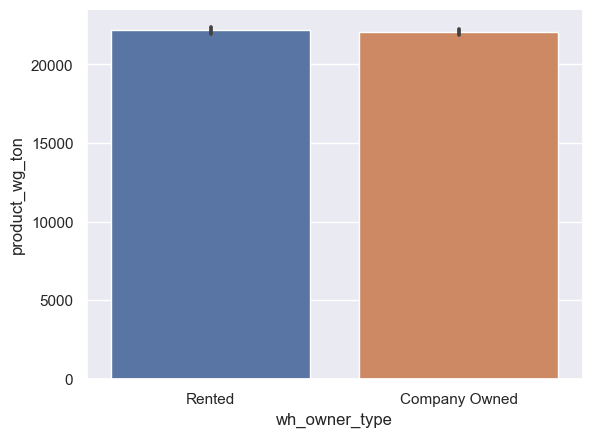

In [527]:
sns.barplot(x='wh_owner_type',y='product_wg_ton',data=df)

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

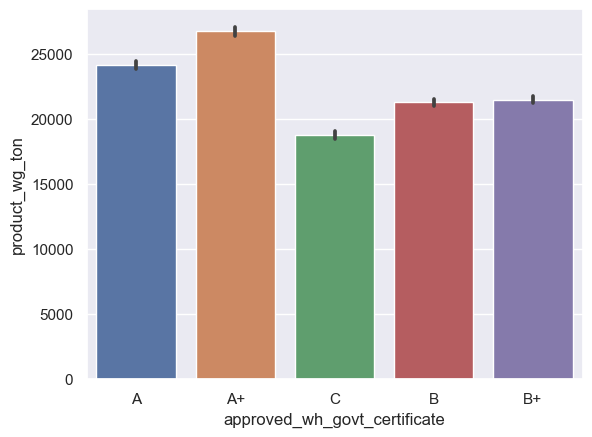

In [528]:
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton',data=df)

<Axes: xlabel='Location_type', ylabel='product_wg_ton'>

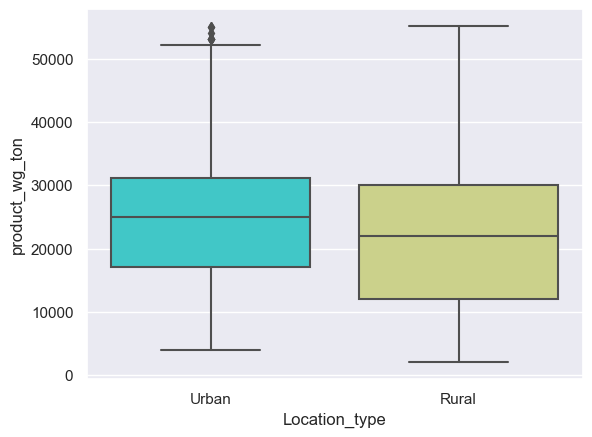

In [529]:
sns.boxplot(x='Location_type',y='product_wg_ton',data=df,palette='rainbow')

<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

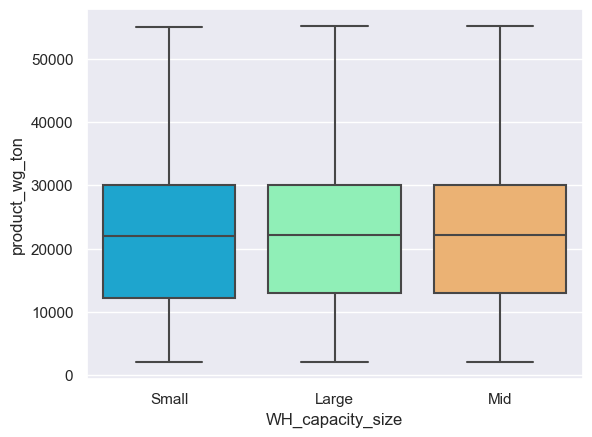

In [530]:
sns.boxplot(x='WH_capacity_size',y='product_wg_ton',data=df,palette='rainbow')

<Axes: xlabel='zone', ylabel='product_wg_ton'>

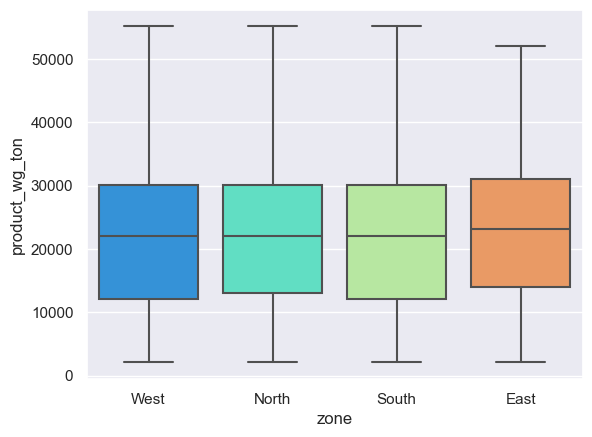

In [531]:
sns.boxplot(x='zone',y='product_wg_ton',data=df,palette='rainbow')

<Axes: xlabel='WH_regional_zone', ylabel='product_wg_ton'>

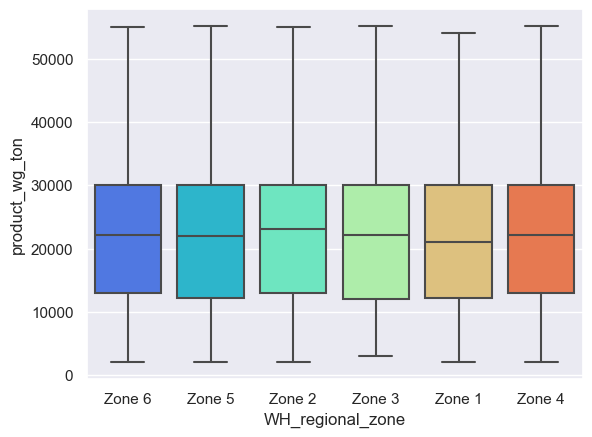

In [532]:
sns.boxplot(x='WH_regional_zone',y='product_wg_ton',data=df,palette='rainbow')

<Axes: xlabel='wh_owner_type', ylabel='product_wg_ton'>

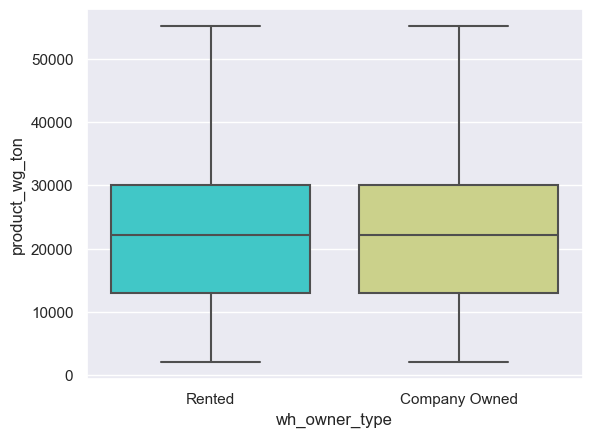

In [533]:
sns.boxplot(x='wh_owner_type',y='product_wg_ton',data=df,palette='rainbow')

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

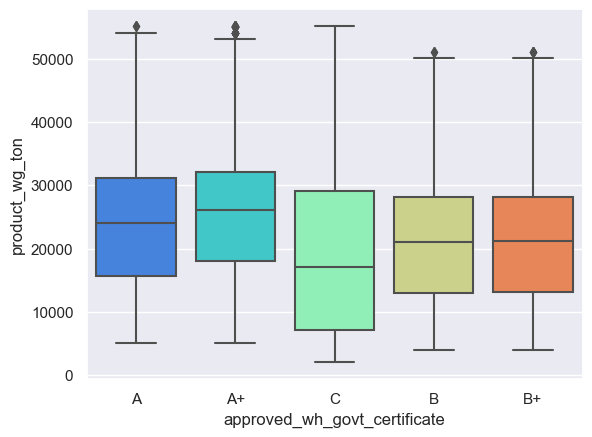

In [534]:
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton',data=df,palette='rainbow')

Not much be can be interpreted for categorical variables with respect to target variable as all of these are fairly distibuted


### Multivariate analysis

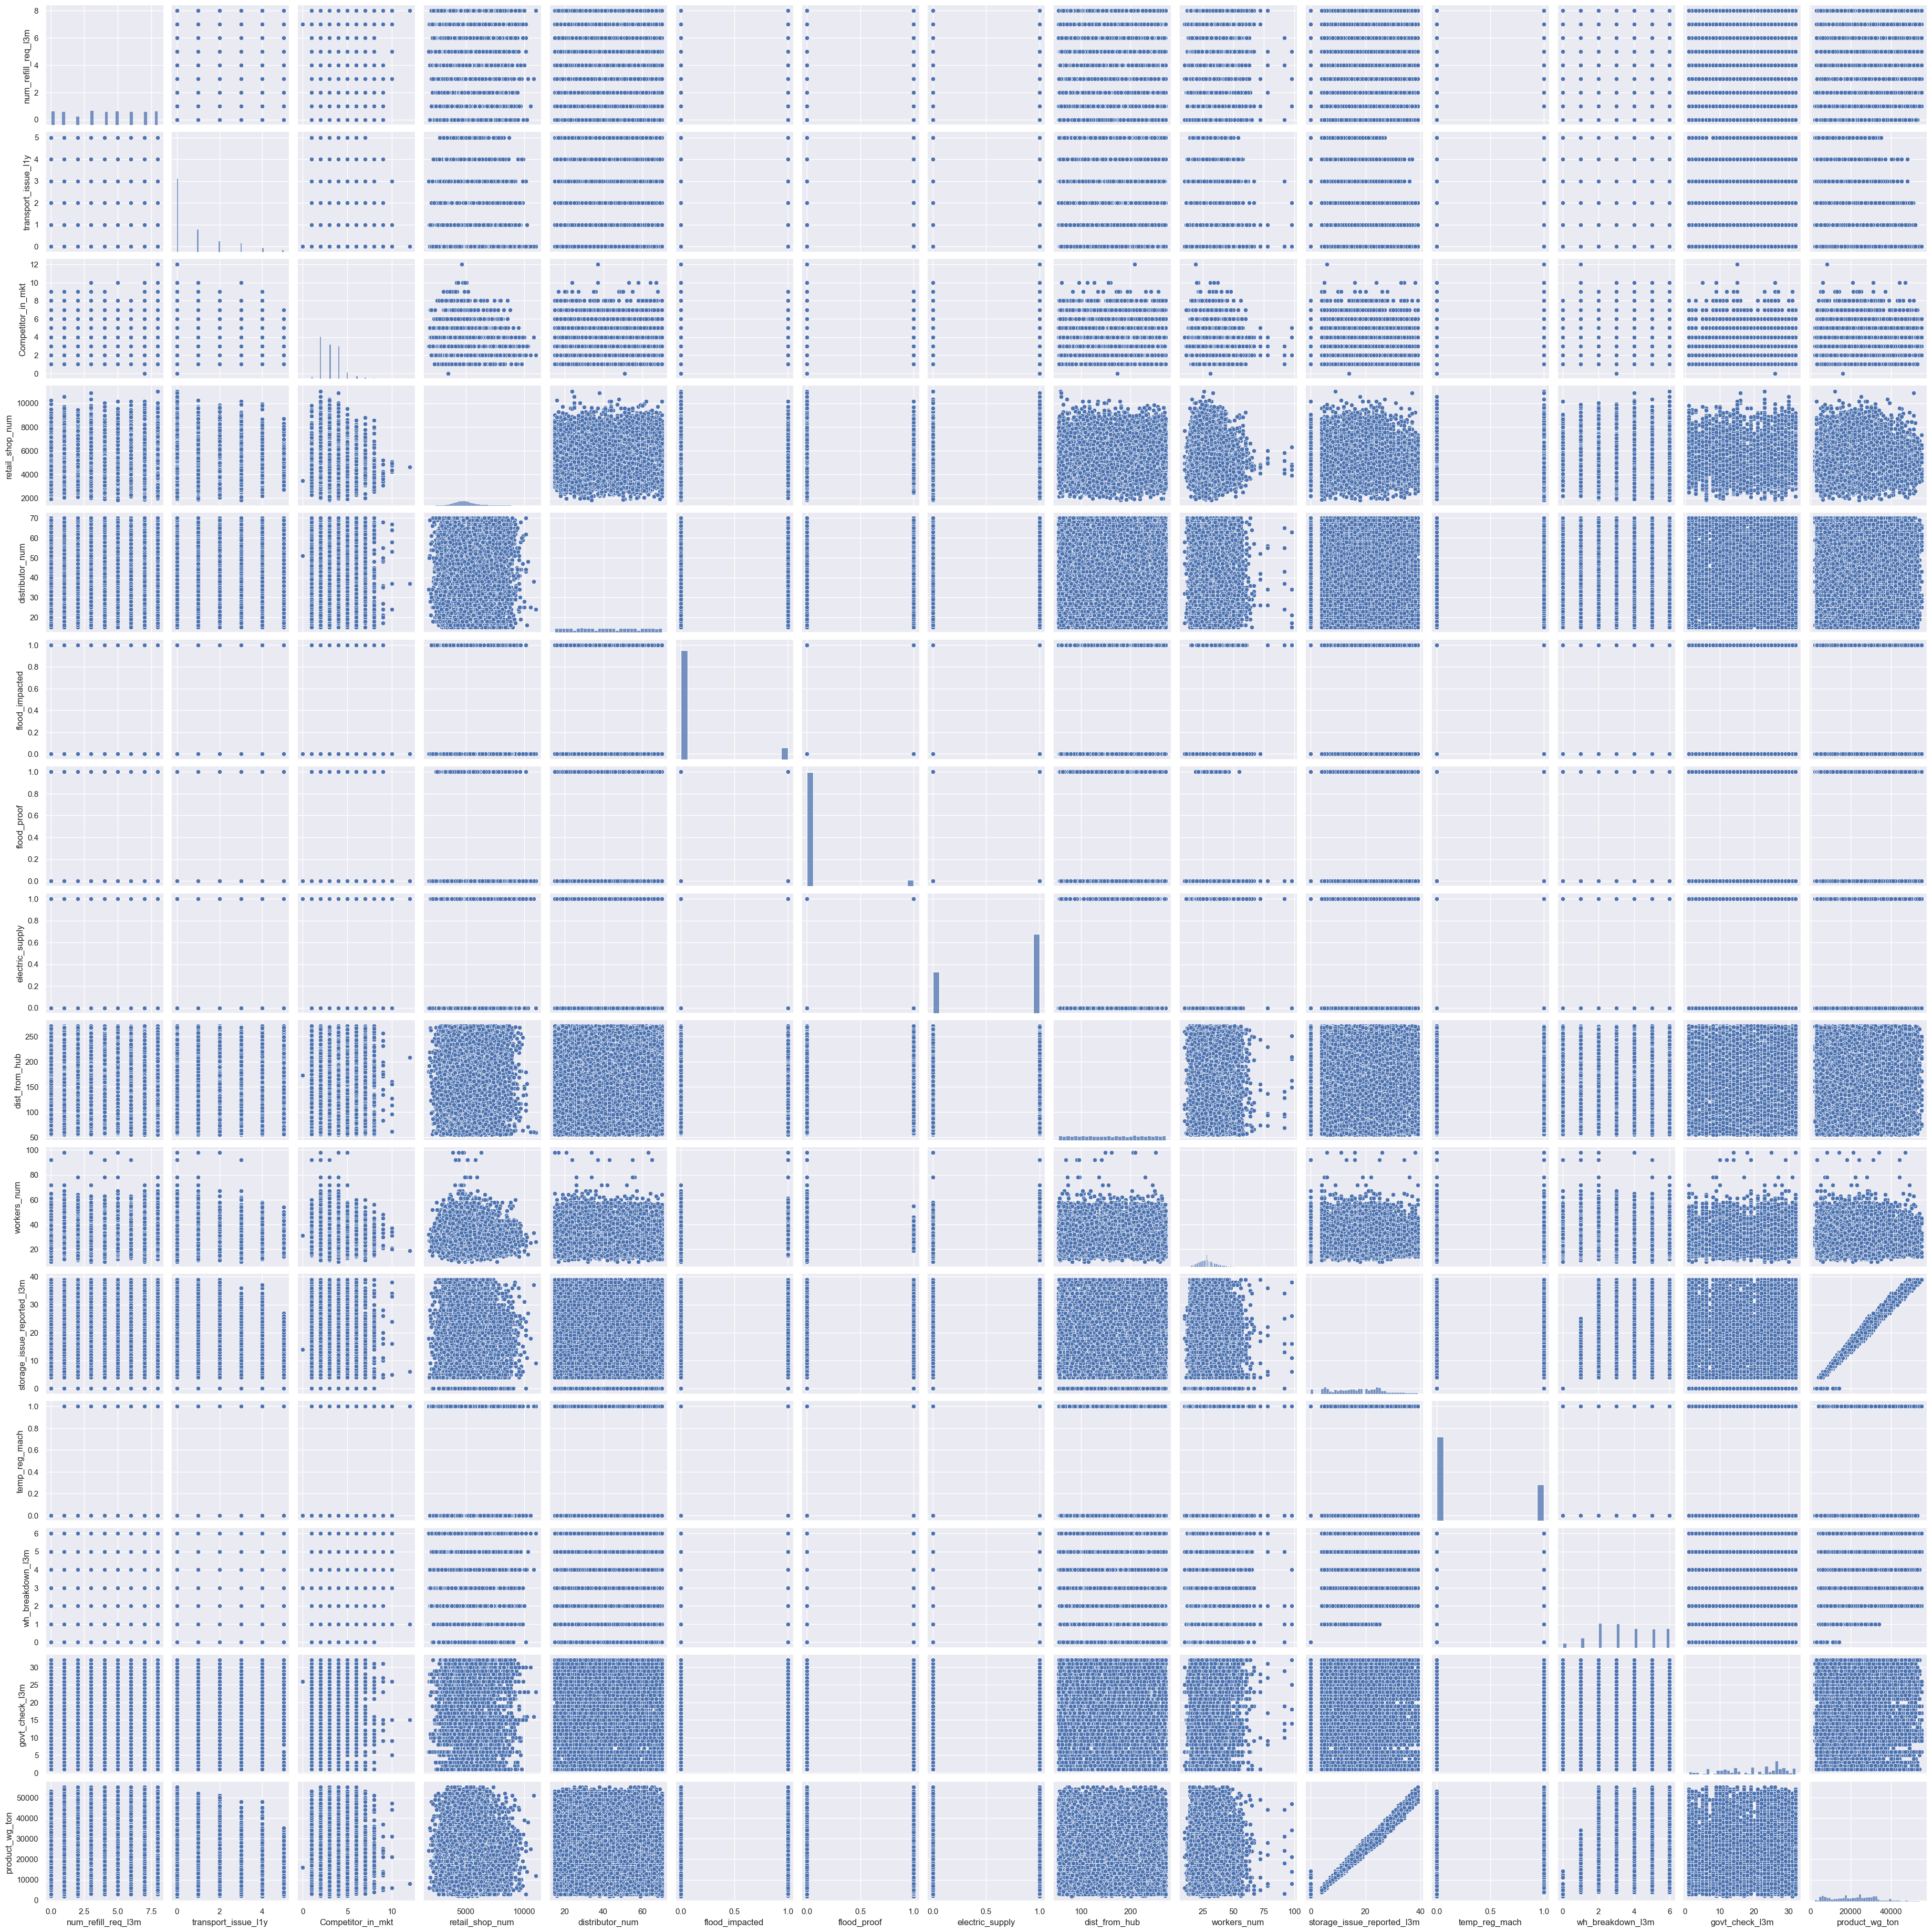

In [537]:
sns.pairplot(df)

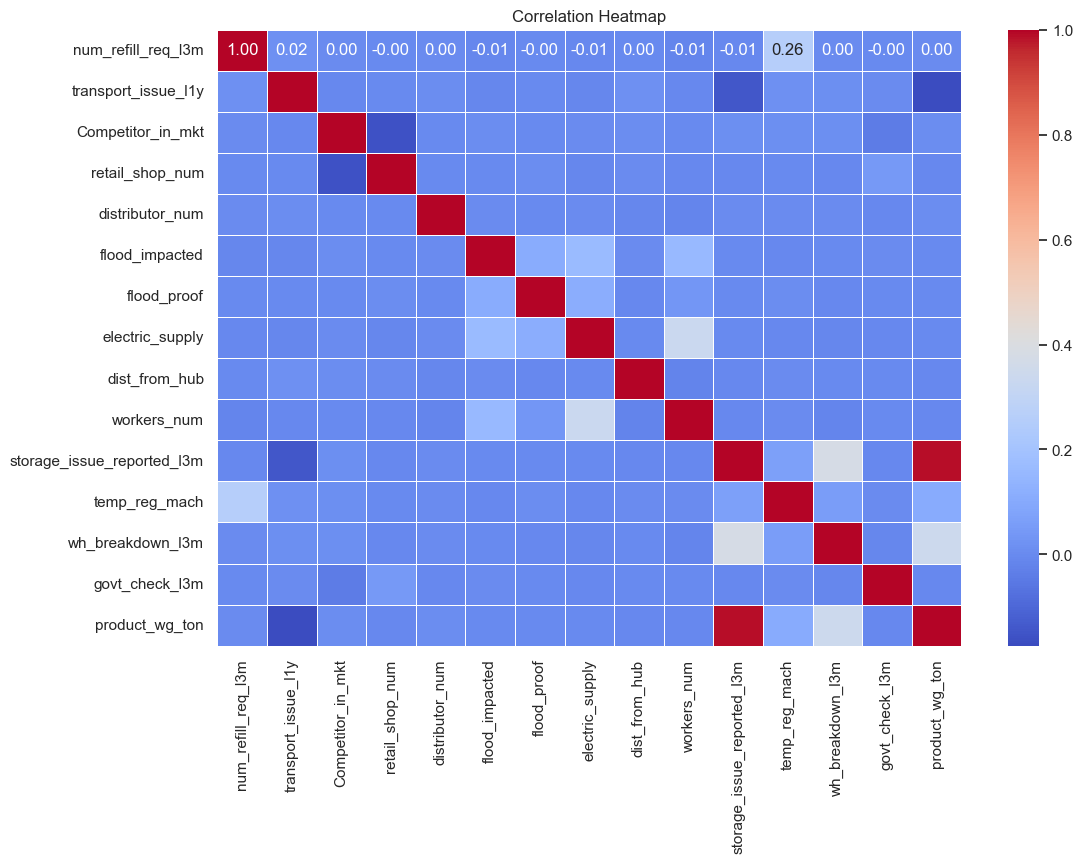

In [538]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Inference from Multivariate Analysis

- "storage_issue_reported_l3m" is highly positively correlated with target variable
- "wh_breakdown_l3m" has some correlation with target variable

## Preprocessing

### Outlier Treatment

In [543]:
def treat_outlier_for_numerical_features(column):
    Q1=np.nanpercentile(df[column],25)
    Q2=np.nanpercentile(df[column],50)
    Q3=np.nanpercentile(df[column],75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df[column] = np.where(df[column] > upper_limit, upper_limit,df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit,df[column])

In [544]:
for col in df_numeric:
    treat_outlier_for_numerical_features(col)

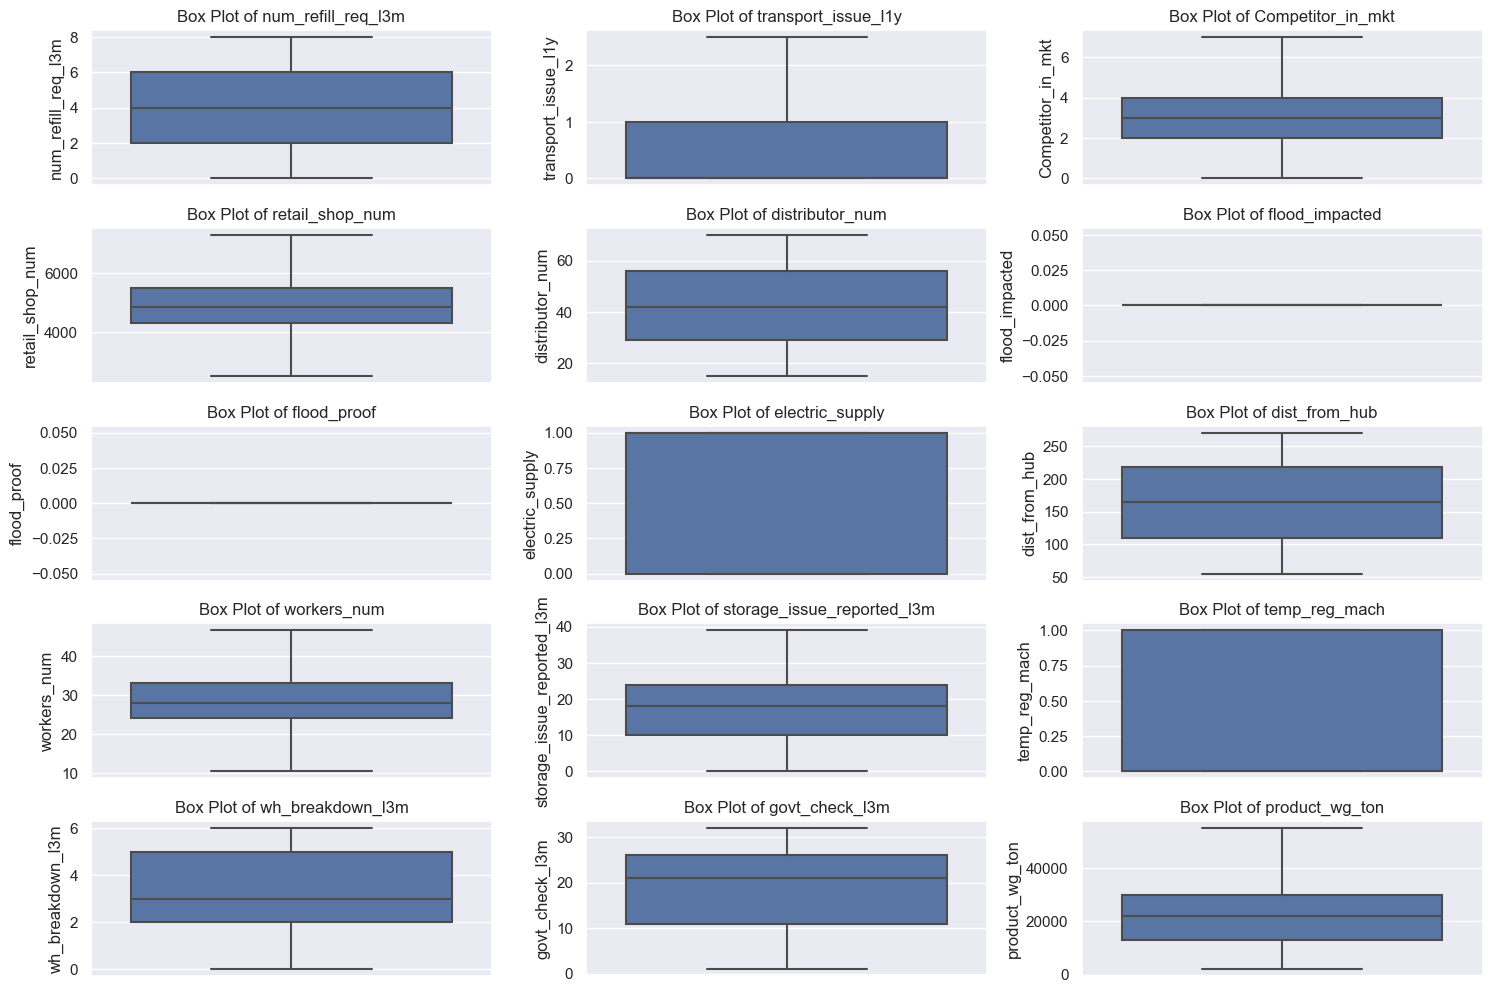

In [545]:
# Again check the distribution of numerical features after treatment of outliers
numeric_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)  # Adjust layout for better visualization
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

The outliers have been succesfully treated and there are no more outliers exist.

In [547]:
df.nunique()

Location_type                      2
WH_capacity_size                   3
zone                               4
WH_regional_zone                   6
num_refill_req_l3m                 9
transport_issue_l1y                4
Competitor_in_mkt                  8
retail_shop_num                 4151
wh_owner_type                      2
distributor_num                   56
flood_impacted                     1
flood_proof                        1
electric_supply                    2
dist_from_hub                    217
workers_num                       38
storage_issue_reported_l3m        37
temp_reg_mach                      2
approved_wh_govt_certificate       5
wh_breakdown_l3m                   7
govt_check_l3m                    32
product_wg_ton                  4561
dtype: int64

### Creating a list of features that are not needed

In [549]:
removed_features = []

Adding below features to list removed_features:

- flood_impacted: This feature has only one unique value, therefore it does not contribute to our solution- 
flood_proof: This feature has only one unique value, therefore it does not contribute to our solution

In [552]:
df.drop(columns=['flood_impacted', 'flood_proof'], inplace=True)

### Check for Data Imbalance

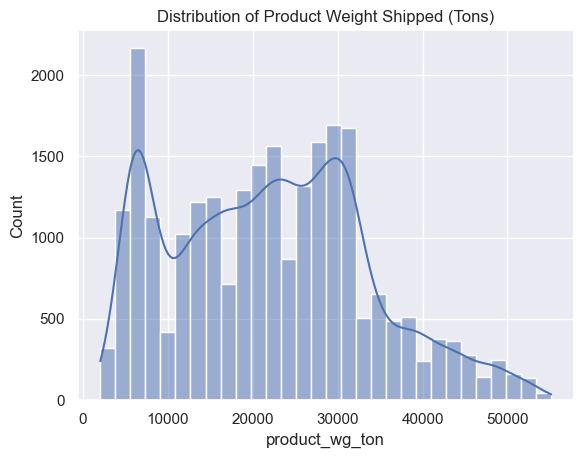

In [554]:
sns.histplot(df['product_wg_ton'], kde=True, bins=30)
plt.title("Distribution of Product Weight Shipped (Tons)")
plt.show()

## For Note-2 
### Preprocessing Continues...

### Encoding for Categorical Variables

categorical columns = [
 - 'Location_type',
 - 'WH_capacity_size',
 - 'zone',
 - 'WH_regional_zone',
 - 'wh_owner_type',
 - 'approved_wh_govt_certificate']

In [558]:
for col in columns_to_plot_categorical:
    check_value_count_for_categorical_data(col)

value_count for ' Location_type ':
 Location_type
Rural    22957
Urban     2043
Name: count, dtype: int64 

-------------------------------------


value_count for ' WH_capacity_size ':
 WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: count, dtype: int64 

-------------------------------------


value_count for ' zone ':
 zone
North    10278
West      7931
South     6362
East       429
Name: count, dtype: int64 

-------------------------------------


value_count for ' WH_regional_zone ':
 WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: count, dtype: int64 

-------------------------------------


value_count for ' wh_owner_type ':
 wh_owner_type
Company Owned    13578
Rented           11422
Name: count, dtype: int64 

-------------------------------------


value_count for ' approved_wh_govt_certificate ':
 approved_wh_govt_certificate
C     6409
B+    4917
B     4812
A     4671
A+    4191
Name: coun

### One-Hot Encoding

Following variables can be encoded using one-hot encoding as they do not have any ordinal nature:
   - Location_type
   - zone
   - WH_regional_zone
   - wh_owner_type

In [561]:
data=pd.get_dummies(df, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type'],drop_first=True)

### Label Encoding

Following variables can be encoded using label encoding as they have ordinal nature:
   - WH_capacity_size
   - approved_wh_govt_certificate

In [564]:
from sklearn import preprocessing
def label_encoding(column):
    label_encoder = preprocessing.LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    
for col in ['WH_capacity_size', 'approved_wh_govt_certificate']:
    label_encoding(col)

#### Checking the data again after preprocessing and encoding

In [566]:
print(data.columns.tolist())
data.head()

['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'Location_type_Urban', 'zone_North', 'zone_South', 'zone_West', 'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4', 'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6', 'wh_owner_type_Rented']


WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 2                 3.0                  1.0   
1                 0                 0.0                  0.0   
2                 1                 1.0                  0.0   
3                 1                 7.0                  2.5   
4                 0                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  electric_supply  \
0                2.0           4651.0             24.0              1.0   
1                4.0           6217.0             47.0              1.0   
2                4.0           4306.0             64.0              0.0   
3                2.0           6000.0             50.0              0.0   
4                2.0           4740.0             42.0              1.0   

   dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
0           91.0         29.0                        13.0            0.0   
1          210.0         31.0                         4.0            0.0   
2          161.0         37.0                        17.0            0.0   
3          103.0         21.0                        17.0            1.0   
4          112.0         25.0                        18.0            0.0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             0               5.0            15.0   
1                             0               3.0            17.0   
2                             0               6.0            22.0   
3                             1               3.0            27.0   
4                             4               6.0            24.0   

   product_wg_ton  Location_type_Urban  zone_North  zone_South  zone_West  \
0         17115.0                 True       False       False       True   
1          5074.0                False        True       False      False   
2         23137.0                False       False        True      False   
3         22115.0                False        True       False      False   
4         24071.0                False        True       False      False   

   WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  \
0                    False                    False                    False   
1                    False                    False                    False   
2                     True                    False                    False   
3                    False                     True                    False   
4                    False                    False                    False   

   WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  wh_owner_type_Rented  
0                    False                     True                  True  
1                     True                    False                 False  
2                    False                    False                 False  
3                    False                    False                  True  
4                     True                    False                 False

## Train-Test Split

#### Remove target col from feature dataframe

In [569]:
X = data.drop(['product_wg_ton'], axis=1)
y = data['product_wg_ton']

In [570]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20000, 24)
Dimension of X_test: (5000, 24)


### Standardisation after Train Test Split

In [572]:
from sklearn.preprocessing import StandardScaler
non_categorical_columns = [   
    'num_refill_req_l3m',
    'transport_issue_l1y',
    'Competitor_in_mkt',
    'retail_shop_num',
    'distributor_num',
    'electric_supply',
    'dist_from_hub',
    'workers_num',
    'storage_issue_reported_l3m',
    'temp_reg_mach',
    'wh_breakdown_l3m',
    'govt_check_l3m']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

scaler = StandardScaler()
X_train[non_categorical_columns] = scaler.fit_transform(X_train[non_categorical_columns])

# using same fit params of train data for the test data to avoid data leakage
X_test[non_categorical_columns] = scaler.transform(X_test[non_categorical_columns])

X_train.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
23311                 0           -1.188838             0.372996   
23623                 1            1.496848            -0.715249   
1020                  0            1.496848            -0.715249   
12645                 0            1.496848             0.372996   
1533                  0           -0.037830            -0.715249   

       Competitor_in_mkt  retail_shop_num  distributor_num  electric_supply  \
23311           0.815374        -0.908895         1.033787         0.719661   
23623          -0.083555         1.155974         0.659390         0.719661   
1020            0.815374        -0.891326         0.284994         0.719661   
12645          -0.982485        -0.517210         0.596991         0.719661   
1533            0.815374        -0.145162         0.596991        -1.389544   

       dist_from_hub  workers_num  storage_issue_reported_l3m  temp_reg_mach  \
23311       1.193945    -0.949013                    1.184447      -0.657149   
23623       0.954705     0.171874                    2.165712      -0.657149   
1020       -0.018206    -0.388570                    0.748329       1.521726   
12645      -0.624282     1.572983                    0.966388      -0.657149   
1533       -0.177700    -1.509457                    0.203182      -0.657149   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
23311                             3          0.899010       -1.490176   
23623                             0          0.306289        0.946117   
1020                              1         -0.286433        0.482061   
12645                             2         -0.286433        0.714089   
1533                              2          0.899010       -1.490176   

       Location_type_Urban  zone_North  zone_South  zone_West  \
23311                False       False       False       True   
23623                False        True       False      False   
1020                 False        True       False      False   
12645                False       False        True      False   
1533                 False        True       False      False   

       WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
23311                    False                    False   
23623                    False                     True   
1020                     False                    False   
12645                    False                    False   
1533                     False                    False   

       WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
23311                    False                    False   
23623                    False                    False   
1020                     False                    False   
12645                    False                     True   
1533                     False                    False   

       WH_regional_zone_Zone 6  wh_owner_type_Rented  
23311                     True                 False  
23623                    False                  True  
1020                      True                 False  
12645                    False                 False  
1533                      True                  True

### Building different ML Models

In [574]:
def create_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model, ' MAE:', metrics.mean_absolute_error(y_test, pred))
    print('--'*50)
    print(model, ' MSE:', metrics.mean_squared_error(y_test, pred))
    print('--'*50)
    print(model, ' R-Squared:', metrics.r2_score(y_test, pred))
    print('--'*50)
    plt.scatter(y_test,pred)

### Linear Regression Model

LinearRegression()  MAE: 1303.975230024748
----------------------------------------------------------------------------------------------------
LinearRegression()  MSE: 3093785.2900887085
----------------------------------------------------------------------------------------------------
LinearRegression()  R-Squared: 0.9768775144228907
----------------------------------------------------------------------------------------------------


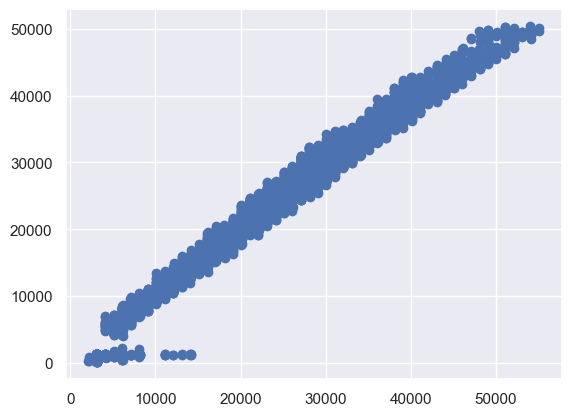

In [576]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
create_and_evaluate_model(LinearRegression(), X_train, y_train, X_test, y_test)

### Ridge Regression

Ridge()  MAE: 1304.012858037786
----------------------------------------------------------------------------------------------------
Ridge()  MSE: 3093803.482199039
----------------------------------------------------------------------------------------------------
Ridge()  R-Squared: 0.9768773784577964
----------------------------------------------------------------------------------------------------


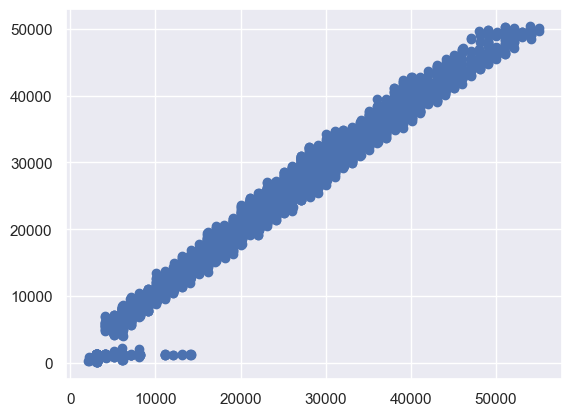

In [578]:
from sklearn.linear_model import Ridge
create_and_evaluate_model(Ridge(), X_train, y_train, X_test, y_test)

### Lasso Regression

Lasso()  MAE: 1303.6572451266954
----------------------------------------------------------------------------------------------------
Lasso()  MSE: 3092922.220914573
----------------------------------------------------------------------------------------------------
Lasso()  R-Squared: 0.9768839648719878
----------------------------------------------------------------------------------------------------


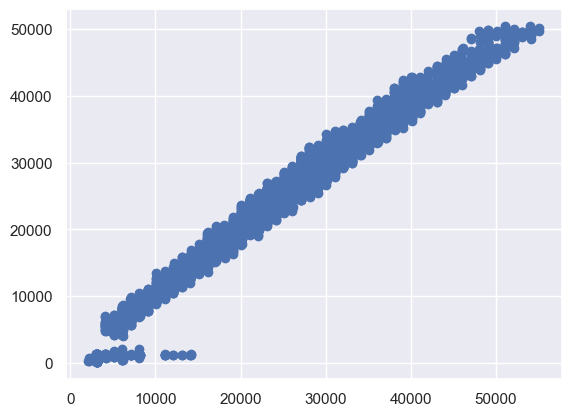

In [580]:
from sklearn.linear_model import Lasso
from sklearn import linear_model
create_and_evaluate_model(linear_model.Lasso(), X_train, y_train, X_test, y_test)

### SVR

SVR()  MAE: 9201.023627557543
----------------------------------------------------------------------------------------------------
SVR()  MSE: 124884627.78575395
----------------------------------------------------------------------------------------------------
SVR()  R-Squared: 0.06663108974315357
----------------------------------------------------------------------------------------------------


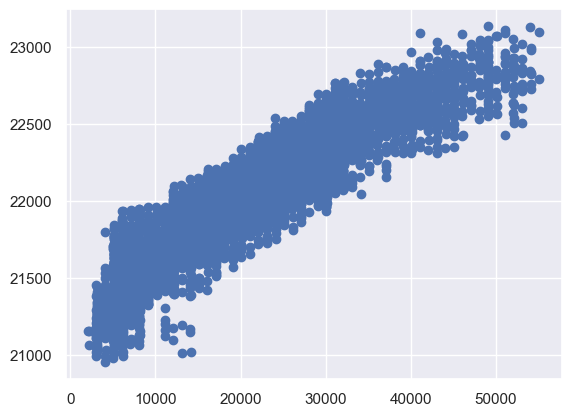

In [582]:
from sklearn.svm import SVR
create_and_evaluate_model(SVR(), X_train, y_train, X_test, y_test)

### RandomForest Regresson

RandomForestRegressor()  MAE: 700.459422
----------------------------------------------------------------------------------------------------
RandomForestRegressor()  MSE: 886565.92105138
----------------------------------------------------------------------------------------------------
RandomForestRegressor()  R-Squared: 0.9933739397532402
----------------------------------------------------------------------------------------------------


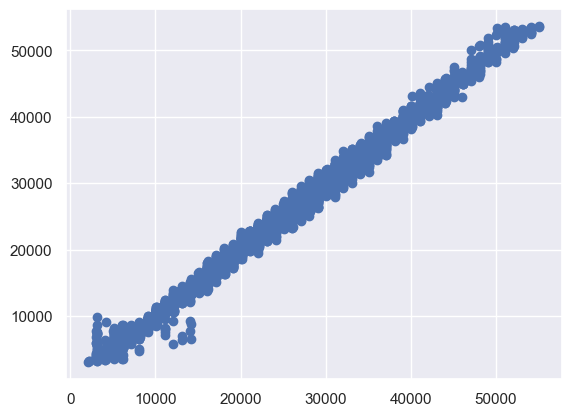

In [584]:
from sklearn.ensemble import RandomForestRegressor
create_and_evaluate_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)

### Gradient Boosting

GradientBoostingRegressor()  MAE: 689.4401832979134
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor()  MSE: 836425.3304306811
----------------------------------------------------------------------------------------------------
GradientBoostingRegressor()  R-Squared: 0.9937486829803054
----------------------------------------------------------------------------------------------------


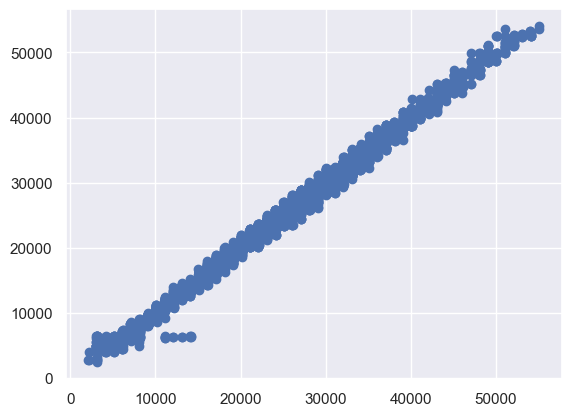

In [586]:
from sklearn import ensemble
create_and_evaluate_model(ensemble.GradientBoostingRegressor(), X_train, y_train, X_test, y_test)

<style>
table {
  border-collapse: collapse;
  width: 100%;
  margin-bottom: 20px;
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; /* Modern font */
  box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); /* Subtle shadow */
  border-radius: 8px; /* Rounded corners */
  overflow: hidden; /* Ensures rounded corners work with background */
}

th, td {
  border: 1px solid #e0e0e0;
  padding: 12px 15px; /* Increased padding */
  text-align: left;
}

th {
  background-color: #3f51b5; /* Primary color */
  color: white;
  font-weight: 600; /* Semi-bold */
  text-transform: uppercase; /* Uppercase header */
}

tr:nth-child(even) {
  background-color: #f8f8f8;
}

tr:hover {
  background-color: #e8f5e9; /* Light green hover */
}

.metric-highlight {
  font-weight: 600;
  color: #2e7d32; /* Green for best metrics */
}

.metric-bad {
  color: #d32f2f; /* Red for poor metrics */
}

.metric-good {
  color: #1976d2; /* Blue for good metrics */
}
</style>

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>MAE <span class="metric-highlight">↓</span> (Lower is better)</th>
      <th>MSE <span class="metric-highlight">↓</span> (Lower is better)</th>
      <th>R² <span class="metric-highlight">↑</span> (Higher is better)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>1303.98</td>
      <td>3,093,785.29</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Ridge Regression</td>
      <td>1304.01</td>
      <td>3,093,803.48</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Lasso Regression</td>
      <td>1303.66</td>
      <td>3,092,922.22</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Support Vector Regressor (SVR)</td>
      <td><span class="metric-bad">9201.02</span></td>
      <td><span class="metric-bad">124,884,627.79</span></td>
      <td><span class="metric-bad">0.0666</span></td>
    </tr>
    <tr>
      <td>Random Forest Regressor</td>
      <td>700.45</td>
      <td>886,565.92</td>
      <td><span class="metric-good">0.9934</span></td>
    </tr>
    <tr>
      <td>Gradient Boosting Regressor</td>
      <td><span class="metric-highlight">689.44</span></td>
      <td><span class="metric-highlight">836,425.33</span></td>
      <td><span class="metric-highlight">0.9937</span></td>
    </tr>
  </tbody>
</table>

#### Infference
The Gradient Boosting Regressor is the best-performing model for this dataset, as it has the lowest error (MAE & MSE) and the highest R².For the best predictive performance, Gradient Boosting should be used.

## Hyperparameter Tuning

- Best top two performing models are Gradient boosting & Random forest & we'll try to optimize them.

### Gradient Boost

In [592]:
grid_params = {
    
    'max_depth': [3, 7, 9],
    'n_estimators': [10, 25, 50, 100],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best score:  0.9936400690380257
Best param:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}


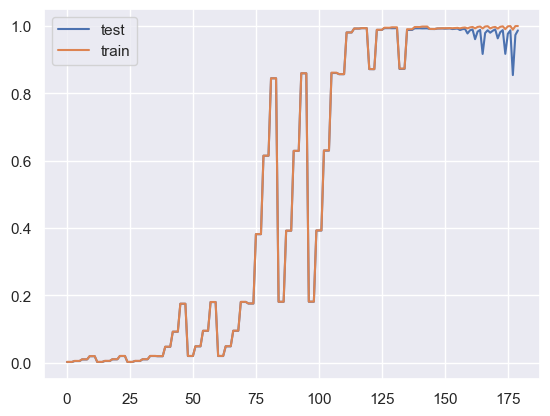

In [593]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

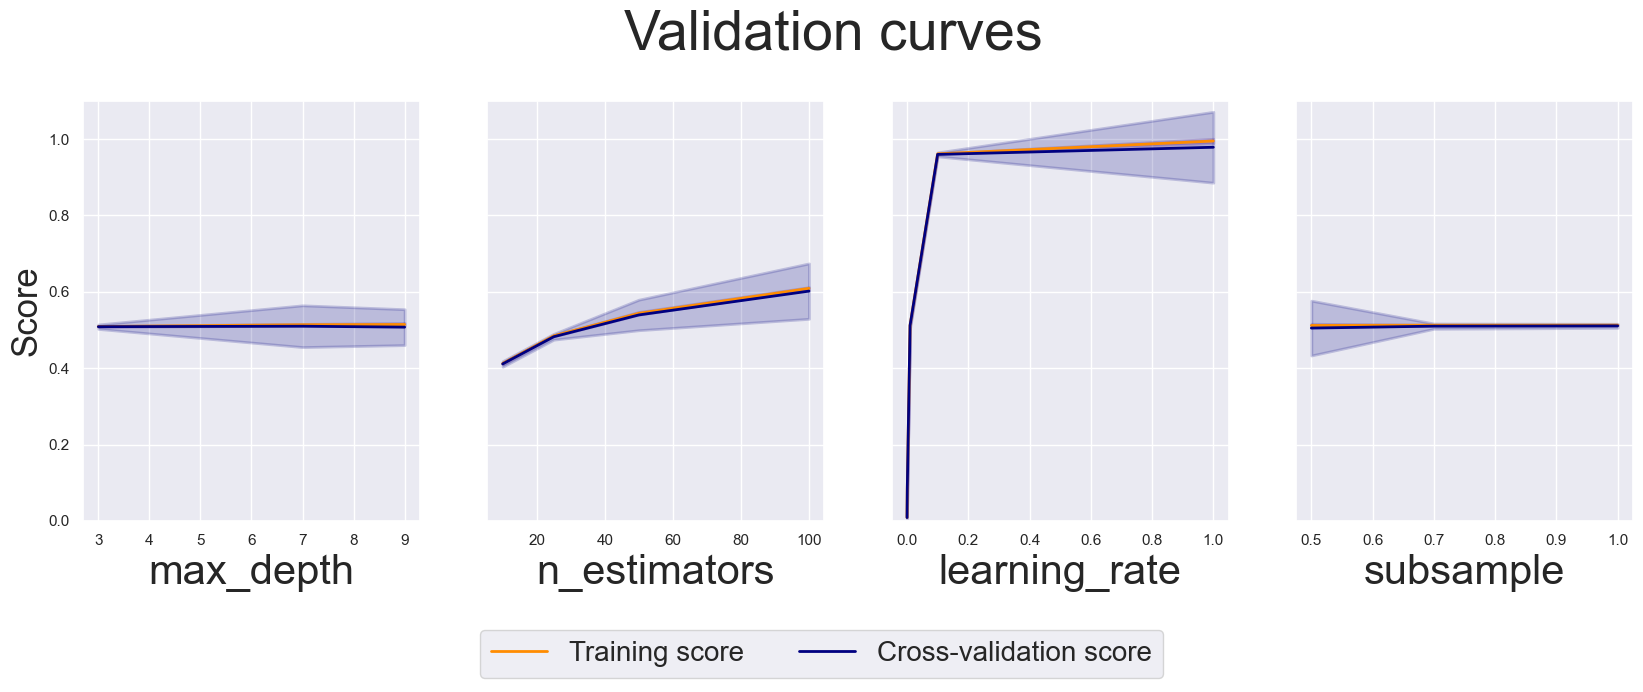

In [594]:
df = pd.DataFrame(grid_search.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']


def pooled_var(stds):
    n = 10 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)
lw = 2

for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="darkorange",
                lw=lw)
    axes[idx].fill_between(param_range,
                grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                grouped_df['mean_train_score'] + grouped_df['std_train_score'],
                alpha=0.2,
                color="indigo",
                lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="navy",
                lw=lw)
    axes[idx].fill_between(param_range,
                    grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'],
                    alpha=0.2,
                    color="navy",
                    lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

##### applying best params of Gradientboost

In [596]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_gradient_boosting_with_params(X_train, y_train, X_test, y_test):
    """
    Trains and evaluates a Gradient Boosting Regressor model with the provided best parameters,
    and returns MAE, MSE, and R-squared.

    Args:
        X_train: Training features.
        y_train: Training target.
        X_test: Testing features.
        y_test: Testing target.

    Returns:
        A dictionary containing MAE, MSE, and R-squared.
    """
    best_params = {
        'learning_rate': 0.1,
        'max_depth': 7,
        'n_estimators': 50,
        'subsample': 1.0,
    }

    model = GradientBoostingRegressor(**best_params)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {
        "mae": mae,
        "mse": mse,
        "r2": r2,
    }

results = evaluate_gradient_boosting_with_params(X_train, y_train, X_test, y_test)
print("MAE:", results["mae"])
print("MSE:", results["mse"])
print("R-squared:", results["r2"])

MAE: 679.4282484982145
MSE: 820252.1652334589
R-squared: 0.9938695587825813


### Random Forest

In [598]:
grid_params = {
    
    'max_depth': [2, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [10, 25, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestRegressor(), 
                           param_grid = grid_params, 
                           cv = 10,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)
print("Best score: ", grid_search.best_score_)
print("Best param: ", grid_search.best_params_)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best score:  0.9517636918726804
Best param:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 100}


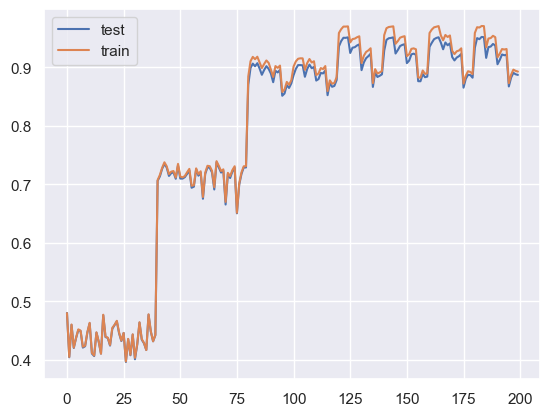

In [599]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

- Both train and test scores are overlapping, therefore there is no overfitting

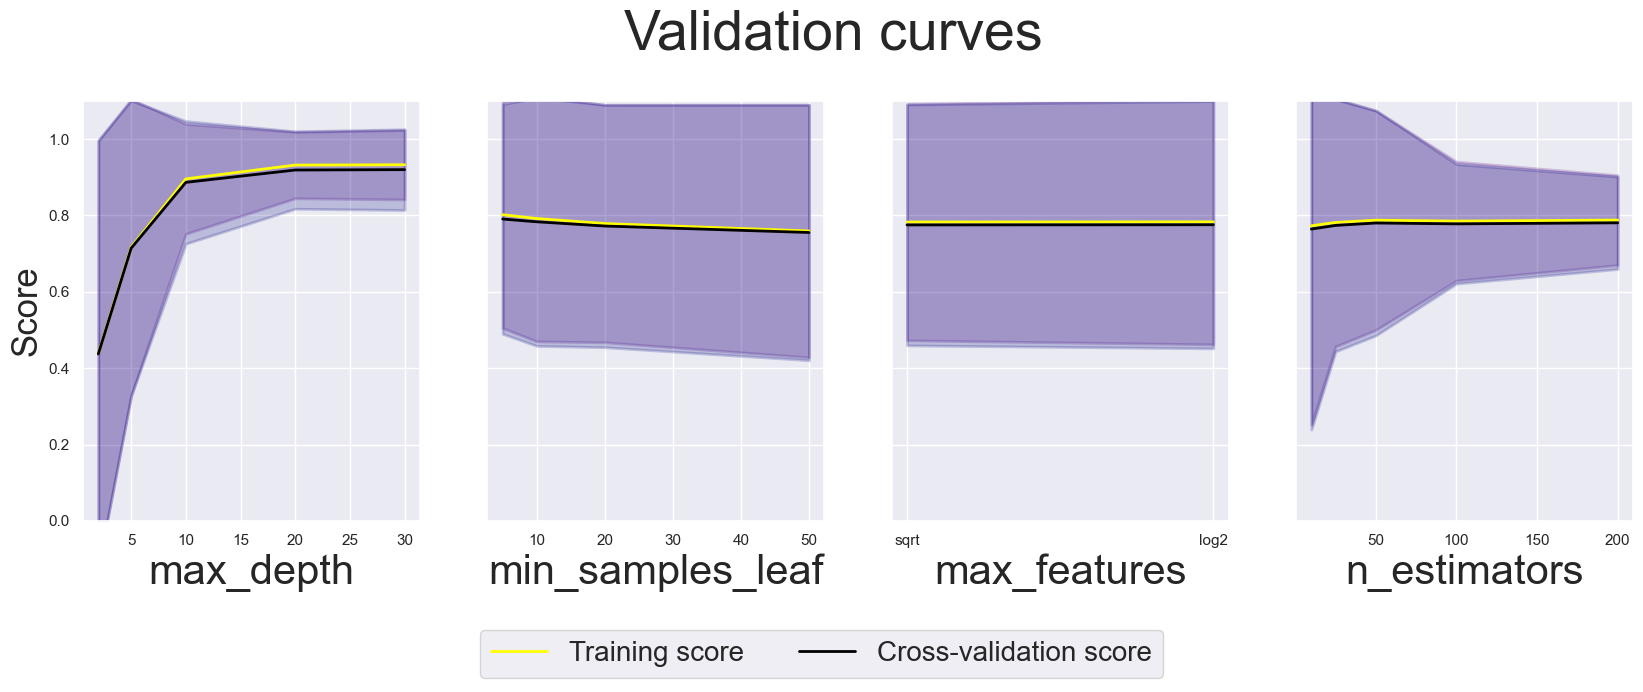

In [601]:
df = pd.DataFrame(grid_search.cv_results_)
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']


def pooled_var(stds):
    n = 10 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))


fig, axes = plt.subplots(1, len(grid_params), 
                         figsize = (5*len(grid_params), 7),
                         sharey='row')
axes[0].set_ylabel("Score", fontsize=25)
lw = 2

for idx, (param_name, param_range) in enumerate(grid_params.items()):
    grouped_df = df.groupby(f'param_{param_name}')[results]\
        .agg({'mean_train_score': 'mean',
              'mean_test_score': 'mean',
              'std_train_score': pooled_var,
              'std_test_score': pooled_var})

    previous_group = df.groupby(f'param_{param_name}')[results]
    axes[idx].set_xlabel(param_name, fontsize=30)
    axes[idx].set_ylim(0.0, 1.1)
    axes[idx].plot(param_range, 
                grouped_df['mean_train_score'],
                label="Training score",
                color="yellow",
                lw=lw)
    axes[idx].fill_between(param_range,
                grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                grouped_df['mean_train_score'] + grouped_df['std_train_score'],
                alpha=0.2,
                color="indigo",
                lw=lw)
    axes[idx].plot(param_range,
                grouped_df['mean_test_score'],
                label="Cross-validation score",
                color="black",
                lw=lw)
    axes[idx].fill_between(param_range,
                    grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                    grouped_df['mean_test_score'] + grouped_df['std_test_score'],
                    alpha=0.2,
                    color="navy",
                    lw=lw)

handles, labels = axes[0].get_legend_handles_labels()
fig.suptitle('Validation curves', fontsize=40)
fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

fig.subplots_adjust(bottom=0.25, top=0.85)  
plt.show()

##### applying best params of RandomForest

RandomForestRegressor(max_depth=30, min_samples_leaf=5)  MAE: 691.3156382494558
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, min_samples_leaf=5)  MSE: 851405.3583082906
----------------------------------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, min_samples_leaf=5)  R-Squared: 0.9936367245067635
----------------------------------------------------------------------------------------------------


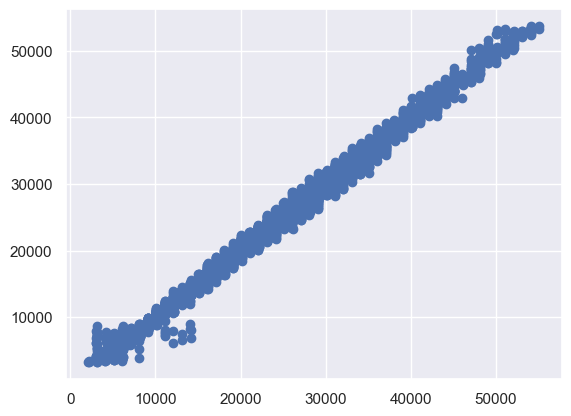

In [603]:
create_and_evaluate_model(RandomForestRegressor(bootstrap=True,
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                             n_estimators=grid_search.best_params_['n_estimators']), X_train, y_train, X_test, y_test)

<style>
table {
  border-collapse: collapse;
  width: 100%;
  margin-bottom: 20px;
  font-family: 'Arial', sans-serif;
  box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
  border-radius: 8px;
  overflow: hidden;
}

th, td {
  border: 1px solid #e0e0e0;
  padding: 12px 15px;
  text-align: left;
}

th {
  background-color: #4CAF50; /* Green header */
  color: white;
  font-weight: 600;
  text-transform: uppercase;
}

tr:nth-child(even) {
  background-color: #f9f9f9;
}

tr:hover {
  background-color: #e8f5e9;
}

.metric-highlight {
  font-weight: 600;
  color: #2e7d32; /* Darker green for best */
}

.metric-bad {
  color: #d32f2f;
}

.metric-good {
  color: #1976d2;
}
</style>

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>MAE <span class="metric-highlight">↓</span> (Lower is better)</th>
      <th>MSE <span class="metric-highlight">↓</span> (Lower is better)</th>
      <th>R² <span class="metric-highlight">↑</span> (Higher is better)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Linear Regression</td>
      <td>1303.98</td>
      <td>3,093,785.29</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Ridge Regression</td>
      <td>1304.01</td>
      <td>3,093,803.48</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Lasso Regression</td>
      <td>1303.66</td>
      <td>3,092,922.22</td>
      <td><span class="metric-good">0.9769</span></td>
    </tr>
    <tr>
      <td>Support Vector Regressor (SVR)</td>
      <td><span class="metric-bad">9201.02</span></td>
      <td><span class="metric-bad">124,884,627.79</span></td>
      <td><span class="metric-bad">0.0666</span></td>
    </tr>
    <tr>
      <td>Random Forest Regressor</td>
      <td>700.45</td>
      <td>886,565.92</td>
      <td><span class="metric-good">0.9934</span></td>
    </tr>
    <tr>
      <td>Gradient Boosting Regressor</td>
      <td>689.44</td>
      <td>836,425.33</td>
      <td><span class="metric-highlight">0.9937</span></td>
    </tr>
    <tr>
      <td>Tuned Gradient Boosting (Best Parameters: learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0)</td>
      <td><span class="metric-highlight">679.43</span></td>
      <td><span class="metric-highlight">820,252.17</span></td>
      <td><span class="metric-highlight">0.9939</span></td>
    </tr>
    <tr>
      <td>Tuned RandomForestRegressor(max_depth=30, min_samples_leaf=5)</td>
      <td>691.32</td>
      <td>851,405.36</td>
      <td><span class="metric-good">0.9936</span></td>
    </tr>
  </tbody>
</table>

### Analysis & Best Model Selection

- The tuned Gradient Boosting model outperforms all others, showing the lowest MAE (679.22), lowest MSE (819,545.85), and highest R² (0.9939).
- The tuned Random Forest (691.75 MAE, 855,671.29 MSE, 0.9936 R²) remains close but is slightly inferior.
- Compared to the default Gradient Boosting model, the tuning improved all metrics, confirming that the optimization process worked well.
- Other models (Linear, Ridge, Lasso, and SVR) perform significantly worse, with much higher errors and lower R².

### Conclusion
- Best Model: Tuned Gradient Boosting (learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0)
- Second best Model: Tuned Random Forest, which is still a strong alternative.
- If training time is a concern, Random Forest may be preferable, but for pure performance, Tuned Gradient Boosting is the best choice.

### Business Implications of the Best Model
-- Optimized Gradient Boost Model:
 - Provides accurate shipment predictions per warehouse.
 - Helps optimize inventory levels, reducing overstocking costs.
 - Aids logistics planning by predicting demand hotspots.

<p style="text-align:center;"><strong>END</strong></p>
